In [14]:
import multiVQA.plots as vq
import multiVQA.ansatz as az

In [2]:
az.var_form(4, 6, 'article').draw()

'q0: ─RZ─RX─RZ─RX─RZ─o───RY───RY─o───RY───RY─o───RY───RY─\nq1: ─RZ─RX─RZ─RX─RZ─Z───RY─o─RY─Z───RY─o─RY─Z───RY─o─RY─\nq2: ─RZ─RX─RZ─RX─RZ───o─RY─Z─RY───o─RY─Z─RY───o─RY─Z─RY─\nq3: ─RZ─RX─RZ─RX─RZ───Z─RY───RY───Z─RY───RY───Z─RY───RY─'

In [3]:
rows = {'kind': 'TEXT', 'instance': 'TEXT', 'trial': 'INT', 'layer_number': 'INT', 'nodes_number': 'INT',
        'optimization': 'TEXT', 'compression': 'FLOAT', 'pauli_string_length': 'INT', 'entanglement': 'TEXT',
        'graph_kind': 'TEXT', 'activation_function': 'TEXT', 'qubits': 'INT', 'solution': 'TEXT',
        'unrounded_solution': 'TEXT', 'max_energy': 'FLOAT', 'min_energy': 'FLOAT', 'energy_ratio': 'FLOAT',
        'initial_parameters': 'TEXT', 'parameters': 'TEXT', 'number_parameters': 'INT', 'epochs': 'INT',
        'time': 'FLOAT'}

In [15]:
x=('layer_number',[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
y='max_energy'
flags= ('nodes_number',[ 45])
fixed = {'entanglement': 'article','optimization': 'SLSQP', 'graph_kind': 'indexed'}
compares = ('kind',["multibaseVQA","goemans_williamson" ])

Averages y: [0.90053913 0.90134132 0.89874669 0.91377771 0.92202136 0.93180865
 0.93594197 0.94080975 0.94215166 0.94541689 0.94677046 0.94619902
 0.94827059 0.94735457 0.94984444] Errors y: [0.005921   0.00527501 0.00522288 0.00514315 0.00479348 0.00496043
 0.00471386 0.00433106 0.00429718 0.00433407 0.00385593 0.00402611
 0.00395498 0.00410264 0.00406238]


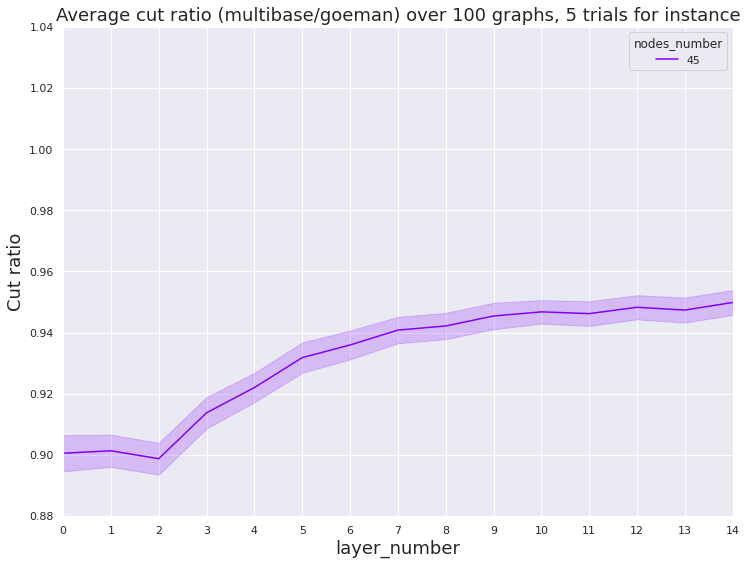

In [19]:
vq.plotter_compare(x, y, flags, fixed, compares, pick_method= 'average', instances=None, save_fig='smart_initialization_SLSQP', ylim=(0.88, 1.04))

In [17]:
fixed = {'layer_number': '0','nodes_number': '18'}

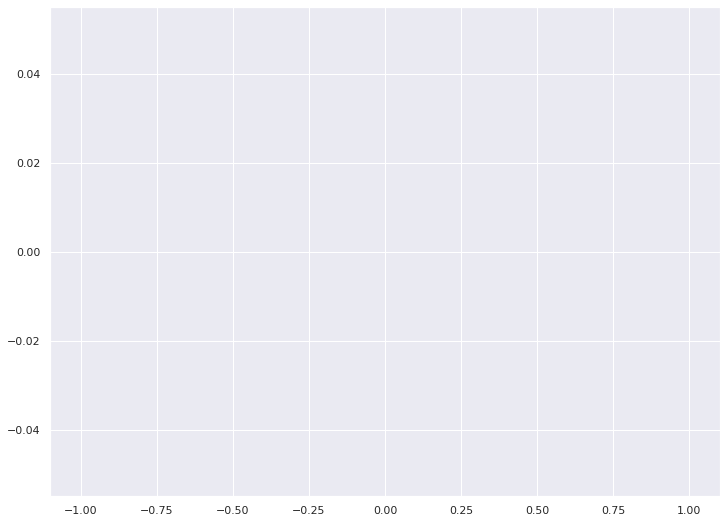

In [18]:
vq.plot_histogram(fixed,  'MaxCutDatabase', 40,4)

In [36]:
fixed = {'nodes_number': '9'}
ylimit = (0, 1800)

MovieWriter ffmpeg unavailable; using Pillow instead.


0.016666666666666663
0.016666666666666663
0.016666666666666663
0.5499999999999999
0.65
0.6166666666666667
0.65
0.65
0.65


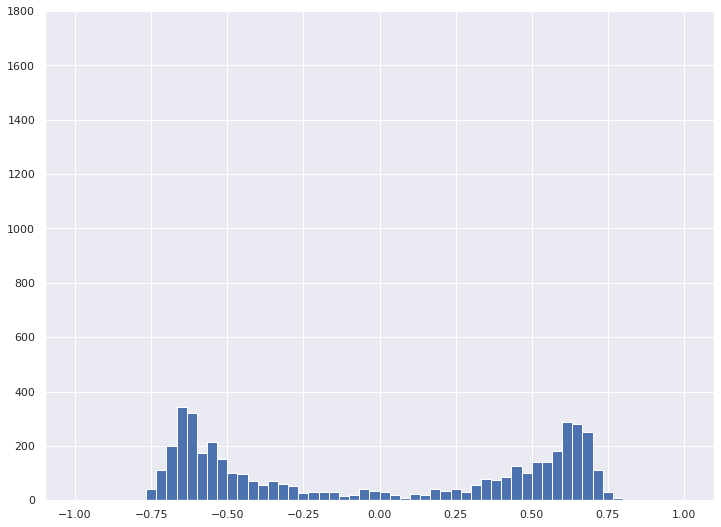

In [37]:
ani = vq.animated_histograms([0,1,2,3,4,5,6,7], fixed,  'MaxCutDatabase', 60, ylimit)

In [23]:
from qibo import models, gates, hamiltonians
import math
import numpy as np
def hypersphere_prober(interval, accuracy, operators, dimension = 3):
        bitmap_color = [ color for color in range(0,256, int(256/dimension))]
        pointer1, pointer2, pointer3 = interval[0], interval[0], interval[0]
        number_evalutations = int(abs(interval[1] - interval[0])/ accuracy)
        final = np.zeros((number_evalutations,number_evalutations,number_evalutations))
        for i in range(dimension):
                while pointer1 != interval[1]:
                        pointer2 = interval[0]
                        while pointer2 != pointer1:
                                pointer3 = interval[0]
                                while pointer3 != pointer2:
                                        final[1,2,3] = bitmap_color[index_color(operators, [pointer1,pointer2, pointer3], dimension)]
                                        pointer3 += accuracy
                                pointer2 += accuracy
                        pointer1 += accuracy
        return final
def index_color(operators, statevector, dimension):
        c = models.Circuit(dimension)
        c.add(gates.RY(0, theta=math.acos(statevector[0])))
        c.add(gates.RY(1, theta=math.acos(statevector[1])))
        c.add(gates.RY(2, theta=math.acos(statevector[2])))
        final_state = c()
        print(final_state)
        counter = 0
        for operator in operators:
                expectation = hamiltonians.SymbolicHamiltonian(operator).expectation(final_state)
                print(expectation)
                if expectation > 0:
                        counter += 1
        return counter

In [26]:
from qibo.symbols import I, X, Y, Z
print(hypersphere_prober((-1,1), 0.1, [X(0)*X(1),X(1)*X(2), X(2)*X(0)], 3))

(0.07071+0j)|001> + (0.30822+0j)|011> + (0.21213+0j)|101> + (0.92466+0j)|111>
tf.Tensor(0.26153393661244045, shape=(), dtype=float64)
tf.Tensor(5.3381116390138656e-17, shape=(), dtype=float64)
tf.Tensor(7.347880794884119e-17, shape=(), dtype=float64)
(0.0866+0j)|001> + (0.37749+0j)|011> + (0.20616+0j)|101> + (0.89861+0j)|111>
tf.Tensor(0.31128764832546757, shape=(), dtype=float64)
tf.Tensor(5.338111639013865e-17, shape=(), dtype=float64)
tf.Tensor(8.74572746635491e-17, shape=(), dtype=float64)
(0.12247+0j)|001> + (0.36742+0j)|011> + (0.29155+0j)|101> + (0.87464+0j)|111>
tf.Tensor(0.42848570571257094, shape=(), dtype=float64)
tf.Tensor(7.34788079488412e-17, shape=(), dtype=float64)
tf.Tensor(8.745727466354912e-17, shape=(), dtype=float64)
(0.02739+0j)|000> + (0.11937+0j)|001> + (0.08216+0j)|010> + (0.35812+0j)|011> + (0.06519+0j)|100> + (0.28417+0j)|101> + (0.19558+0j)|110> + (0.8525+0j)|111>
tf.Tensor(0.4284857057125709, shape=(), dtype=float64)
tf.Tensor(0.2615339366124404, shape=(), 

ValueError: math domain error

The parameters of the line: [-0.00467284  0.67240741]


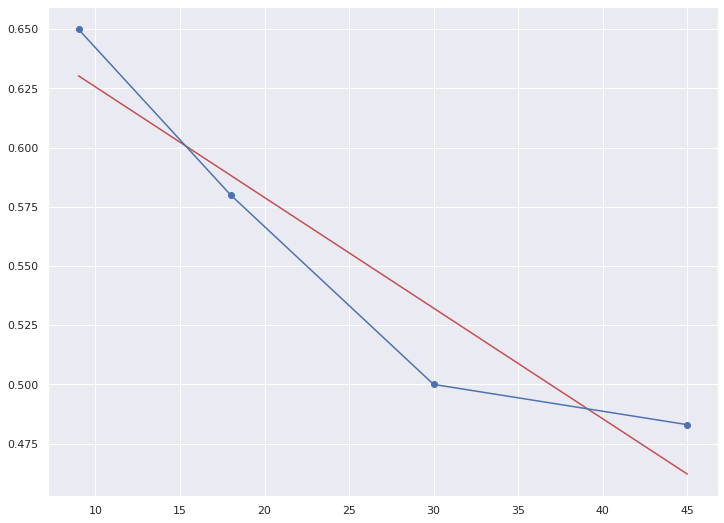

In [41]:
import matplotlib.pyplot as plt
import numpy as np
nodes =np.array([9, 18, 30, 45])
mode = np.array([0.65,0.58, 0.5, 0.483])
theta = np.polyfit(nodes, mode, 1)

print(f'The parameters of the line: {theta}')

# Now, calculating the y-axis values against x-values according to
# the parameters theta0, theta1 and theta2
y_line = theta[1] + theta[0] * nodes

# Plotting the data points and the best fit line
plt.scatter(nodes, mode)
plt.plot(nodes, y_line, 'r')
plt.plot(nodes, mode)
plt.show()